# IPL 2021 Match Score Prediction Contest Organized by IIT Madras Online B.Sc. Programme Team

## Few Deep Learning Models

In [1]:
# Imports required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

import pickle

In [2]:
# Sets Pandas option to show all columns

pd.set_option('display.max_columns', None)

In [3]:
# Downloads the dataset from cricsheet.org/downloads (overwrites the file if exists)

!wget https://cricsheet.org/downloads/ipl_csv2.zip -O Data/ipl_csv2.zip

# Unzips the data (overwrites existing files having same name)

!unzip -o -d Data Data/ipl_csv2.zip all_matches.csv README.txt

--2021-04-27 07:58:11--  https://cricsheet.org/downloads/ipl_csv2.zip
Resolving cricsheet.org (cricsheet.org)... 64.90.49.16
Connecting to cricsheet.org (cricsheet.org)|64.90.49.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3319150 (3.2M) [application/zip]
Saving to: ‘Data/ipl_csv2.zip’

Data/ipl_csv2.zip   100%[===================>]   3.17M   601KB/s    in 8.3s    

2021-04-27 07:58:21 (392 KB/s) - ‘Data/ipl_csv2.zip’ saved [3319150/3319150]

Archive:  Data/ipl_csv2.zip
  inflating: Data/README.txt         
  inflating: Data/all_matches.csv    


In [4]:
# Load data for all matches

data = pd.read_csv("Data/all_matches.csv")

/home/pradip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Checks top few rows of the data

data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checks bottom rows of the data

data.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
198725,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,15.6,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,DJ Hooda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198726,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.1,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,Arshdeep Singh,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198727,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.2,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,Arshdeep Singh,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198728,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.3,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,Arshdeep Singh,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198729,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.4,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,Arshdeep Singh,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Checks for missing values

data.isna().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     192712
noballs                   197924
byes                      198202
legbyes                   195557
penalty                   198728
wicket_type               188939
player_dismissed          188939
other_wicket_type         198730
other_player_dismissed    198730
dtype: int64

In [8]:
# Inserts a new calculated column called "score_off_ball" which is a sum of values in 
# columns "runs_off_bat" and "extras" just after column "extras" to indicate contributing score off the ball
# to make calculating total score at the end of the match easy

data.insert(loc=13, column="score_off_ball", value=data.runs_off_bat + data.extras)

#### Checks for venues for duplicates with slightly different names, if any, and updates the rows with the same venue names accordingly

In [9]:
data.venue.value_counts().sort_index()

Arun Jaitley Stadium                                     3356
Barabati Stadium                                         1695
Brabourne Stadium                                        2469
Brabourne Stadium, Mumbai                                 250
Buffalo Park                                              715
De Beers Diamond Oval                                     726
Dr DY Patil Sports Academy                               3993
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      3037
Dubai International Cricket Stadium                      8080
Eden Gardens                                            17988
Feroz Shah Kotla                                        13950
Green Park                                                921
Himachal Pradesh Cricket Association Stadium             2159
Holkar Cricket Stadium                                   1965
JSCA International Stadium Complex                       1671
Kingsmead                                                3643
M Chinna

In [10]:
# Updates these venues that are mentioned in different names with same name

data.venue[data.venue.str.contains("Brabourne", 
                                                 case=False)] = "Brabourne Stadium"

data.venue[data.venue.str.contains("Chinnaswamy", 
                                                 case=False)] = "M. Chinnaswamy Stadium"

data.venue[data.venue.str.contains("Chidambaram", 
                                                 case=False)] = "M. A. Chidambaram Stadium"

data.venue[data.venue.str.contains(r'Narendra Modi', 
                                                 case=False)] = "Narendra Modi Stadium"

data.venue[data.venue.str.contains(r'Punjab Cricket|IS Bindra|Inderjit Singh Bindra', 
                                                 case=False)] = "IS Bindra Stadium"

data.venue[data.venue.str.contains("Rajiv Gandhi", 
                                                 case=False)] = "Rajiv Gandhi International Cricket Stadium"

data.venue[data.venue.str.contains("Wankhede", 
                                                 case=False)] = "Wankhede Stadium"

/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from s

#### Checks for teams for duplicates with slightly different names, if any, and updates the rows with the same team names accordingly

In [11]:
data.batting_team.append(data.bowling_team).value_counts().sort_index()

Chennai Super Kings            43907
Deccan Chargers                18073
Delhi Capitals                  9258
Delhi Daredevils               37511
Gujarat Lions                   7111
Kings XI Punjab                45129
Kochi Tuskers Kerala            3196
Kolkata Knight Riders          46646
Mumbai Indians                 50188
Pune Warriors                  10900
Punjab Kings                    1403
Rajasthan Royals               39317
Rising Pune Supergiant          3828
Rising Pune Supergiants         3195
Royal Challengers Bangalore    47000
Sunrisers Hyderabad            30798
dtype: int64

In [12]:
# Updates team name from "Delhi Daredevils" with the new name "Delhi Capitals"

data.batting_team[data.batting_team.str.contains("Delhi Daredevils", case=False)] = "Delhi Capitals"
data.bowling_team[data.bowling_team.str.contains("Delhi Daredevils", case=False)] = "Delhi Capitals"

# Updates team name from "Kings XI Punjab" with the new name "Punjab Kings"

data.batting_team[data.batting_team.str.contains("Kings XI Punjab", case=False)] = "Punjab Kings"
data.bowling_team[data.bowling_team.str.contains("Kings XI Punjab", case=False)] = "Punjab Kings"

# Updates appropriate team name for "Rising Pune Supergiant"

data.batting_team[data.batting_team.str.contains("Rising Pune Supergiants", case=False)] = "Rising Pune Supergiant"
data.bowling_team[data.bowling_team.str.contains("Rising Pune Supergiants", case=False)] = "Rising Pune Supergiant"


/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [13]:
# Removes columsn that are not required

columns_required = ["match_id", "venue", "innings", "ball", "batting_team", "bowling_team", 
                    "striker", "non_striker", "bowler", "score_off_ball"]

data = data[columns_required]

In [14]:
# Considers only first 6 overs

data_6_overs = data[data.ball <= 6.0]

In [15]:
# Checks how the 6 overs data looks

data_6_overs

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,score_off_ball
0,335982,M. Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1
1,335982,M. Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
2,335982,M. Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,1
3,335982,M. Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
4,335982,M. Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
...,...,...,...,...,...,...,...,...,...,...
198661,1254078,Narendra Modi Stadium,2,5.2,Kolkata Knight Riders,Punjab Kings,EJG Morgan,RA Tripathi,Mohammed Shami,0
198662,1254078,Narendra Modi Stadium,2,5.3,Kolkata Knight Riders,Punjab Kings,EJG Morgan,RA Tripathi,Mohammed Shami,1
198663,1254078,Narendra Modi Stadium,2,5.4,Kolkata Knight Riders,Punjab Kings,RA Tripathi,EJG Morgan,Mohammed Shami,0
198664,1254078,Narendra Modi Stadium,2,5.5,Kolkata Knight Riders,Punjab Kings,RA Tripathi,EJG Morgan,Mohammed Shami,0


#### Some statistics below to realize the trend

In [16]:
# Venue wise average innings runs after 6 overs

data_6_overs.groupby(
    ["venue", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
        ["venue"]).score_off_ball.mean().sort_values(ascending=False)

venue
Green Park                                             55.000000
Brabourne Stadium                                      51.863636
Holkar Cricket Stadium                                 51.722222
Saurashtra Cricket Association Stadium                 51.045455
IS Bindra Stadium                                      48.428571
Arun Jaitley Stadium                                   47.866667
Feroz Shah Kotla                                       47.092437
Sharjah Cricket Stadium                                47.027778
Maharashtra Cricket Association Stadium                46.795455
Eden Gardens                                           46.266234
Kingsmead                                              45.933333
M. Chinnaswamy Stadium                                 45.428571
M. A. Chidambaram Stadium                              45.326087
SuperSport Park                                        45.250000
Wankhede Stadium                                       45.190476
Rajiv Gandhi Intern

In [17]:
# Batting team wise average innings runs after 6 overs

data_6_overs.groupby(["batting_team", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
    ["batting_team"]).score_off_ball.mean().sort_values(ascending=False)

batting_team
Gujarat Lions                  50.290323
Kochi Tuskers Kerala           48.571429
Rising Pune Supergiant         47.433333
Sunrisers Hyderabad            46.631579
Punjab Kings                   45.766169
Deccan Chargers                45.560000
Kolkata Knight Riders          45.400990
Delhi Capitals                 45.290640
Chennai Super Kings            44.961957
Mumbai Indians                 44.408451
Royal Challengers Bangalore    44.344828
Rajasthan Royals               44.035714
Pune Warriors                  42.111111
Name: score_off_ball, dtype: float64

In [18]:
# Striker's inning wise average scores after 6 overs

pd.set_option("display.max_rows", None)  # To view all the rows temporarily

data_6_overs.groupby(
    ["striker", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
        ["striker"]).score_off_ball.mean().sort_values(ascending=False)

striker
AB McDonald          31.000000
Ankit Sharma         27.000000
AB Agarkar           22.000000
C Madan              22.000000
A Flintoff           21.000000
D Padikkal           20.578947
JM Bairstow          20.360000
MJ Lumb              20.250000
CA Lynn              20.225000
DR Smith             20.061538
Anirudh Singh        20.000000
DA Warner            19.971631
LMP Simmons          19.931034
E Lewis              19.866667
AD Hales             19.666667
LS Livingstone       19.666667
JC Buttler           19.568182
ML Hayden            19.303030
ST Jayasuriya        19.233333
Shoaib Malik         19.000000
AB Barath            19.000000
UT Khawaja           18.833333
CH Gayle             18.755556
AC Gilchrist         18.437500
KL Rahul             18.289855
Q de Kock            18.126761
RA Tripathi          18.121212
S Sohal              18.117647
PK Garg              18.000000
BJ Haddin            18.000000
CH Morris            18.000000
R Bishnoi            18.000000


In [19]:
pd.reset_option('display.max_rows')   # Resets to its default number of visible rows

In [20]:
# Resets its index

data_6_overs.reset_index(drop = True, inplace = True)

In [21]:
# Checks how the 6 overs data looks after reset index and with new column "score_off_ball"

data_6_overs

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,score_off_ball
0,335982,M. Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1
1,335982,M. Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
2,335982,M. Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,1
3,335982,M. Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
4,335982,M. Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
...,...,...,...,...,...,...,...,...,...,...
62654,1254078,Narendra Modi Stadium,2,5.2,Kolkata Knight Riders,Punjab Kings,EJG Morgan,RA Tripathi,Mohammed Shami,0
62655,1254078,Narendra Modi Stadium,2,5.3,Kolkata Knight Riders,Punjab Kings,EJG Morgan,RA Tripathi,Mohammed Shami,1
62656,1254078,Narendra Modi Stadium,2,5.4,Kolkata Knight Riders,Punjab Kings,RA Tripathi,EJG Morgan,Mohammed Shami,0
62657,1254078,Narendra Modi Stadium,2,5.5,Kolkata Knight Riders,Punjab Kings,RA Tripathi,EJG Morgan,Mohammed Shami,0


In [22]:
# Creates initial innings group out of 6 overs to further add other innings related data into

innings = data_6_overs.groupby(
    ["match_id", "venue", "innings", "batting_team", "bowling_team"])

In [23]:
# Calculates the innings wise score at the end of 6 overs

innings_runs = innings.score_off_ball.sum()

innings_runs.name = "score_6_overs"

In [24]:
# Checks how the innings data looks like

innings_runs

match_id  venue                      innings  batting_team                 bowling_team               
335982    M. Chinnaswamy Stadium     1        Kolkata Knight Riders        Royal Challengers Bangalore    61
                                     2        Royal Challengers Bangalore  Kolkata Knight Riders          26
335983    IS Bindra Stadium          1        Chennai Super Kings          Punjab Kings                   53
                                     2        Punjab Kings                 Chennai Super Kings            63
335984    Feroz Shah Kotla           1        Rajasthan Royals             Delhi Capitals                 40
                                                                                                          ..
1254077   M. A. Chidambaram Stadium  2        Sunrisers Hyderabad          Delhi Capitals                 56
                                     3        Sunrisers Hyderabad          Delhi Capitals                  7
                         

In [25]:
# Resets the index of the group to flatten the grouped data

data_6_overs_agg = innings_runs.reset_index()

In [26]:
# Checks how the flattend innings wise grouped data looks

data_6_overs_agg

,match_id,venue,innings,batting_team,bowling_team,score_6_overs
0,335982,M. Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,61
1,335982,M. Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,26
2,335983,IS Bindra Stadium,1,Chennai Super Kings,Punjab Kings,53
3,335983,IS Bindra Stadium,2,Punjab Kings,Chennai Super Kings,63
4,335984,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Capitals,40
...,...,...,...,...,...,...
1697,1254077,M. A. Chidambaram Stadium,2,Sunrisers Hyderabad,Delhi Capitals,56
1698,1254077,M. A. Chidambaram Stadium,3,Sunrisers Hyderabad,Delhi Capitals,7
1699,1254077,M. A. Chidambaram Stadium,4,Delhi Capitals,Sunrisers Hyderabad,8
1700,1254078,Narendra Modi Stadium,1,Punjab Kings,Kolkata Knight Riders,37


In [27]:
# Encodes venues with one-hot encoding technique

venue_count = len(data_6_overs_agg.venue.unique())
venue_encoder = OneHotEncoder(handle_unknown='ignore')
venue_encoded = pd.DataFrame(venue_encoder.fit_transform(data_6_overs_agg[["venue"]]).toarray(),
                            columns=[("venue_" + str(i)) for i in range(venue_count)])

# Saves the encoder into persistent store for later use

with open("Models/Venue_Encoder.pickle", "wb") as f:
    pickle.dump(venue_encoder, f, pickle.HIGHEST_PROTOCOL)

# Joins the encoded venue columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(venue_encoded).drop(["venue"], axis = 1)

In [28]:
# Encodes innings with one-hot encoding technique

innings_count = len(data_6_overs_agg.innings.unique())
innings_encoder = OneHotEncoder(handle_unknown='ignore')
innings_encoded = pd.DataFrame(innings_encoder.fit_transform(data_6_overs_agg[["innings"]]).toarray(),
                            columns=[("innings_" + str(i)) for i in range(innings_count)])

# Saves the encoder into persistent store for later use

with open("Models/Innings_Encoder.pickle", "wb") as f:
    pickle.dump(innings_encoder, f, pickle.HIGHEST_PROTOCOL)

# Joins the encoded innings columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(innings_encoded).drop(["innings"], axis = 1)

In [29]:
# Now, encodes teams with one-hot encoding technique

team = data_6_overs_agg.batting_team.append(data_6_overs_agg.bowling_team).unique()
team_count = len(team)
team_encoder = OneHotEncoder(handle_unknown='ignore')
team_encoder.fit(pd.DataFrame(team))

batting_team_encoded = pd.DataFrame(team_encoder.transform(data_6_overs_agg[["batting_team"]]).toarray(),
                                    columns=[("batting_team_" + str(i)) for i in range(team_count)])

bowling_team_encoded = pd.DataFrame(team_encoder.transform(data_6_overs_agg[["bowling_team"]]).toarray(),
                                    columns=[("bowling_team_" + str(i)) for i in range(team_count)])

# Saves the encoder into persistent store for later use

with open("Models/Team_Encoder.pickle", "wb") as f:
    pickle.dump(team_encoder, f, pickle.HIGHEST_PROTOCOL)
    
# Joins the encoded team columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(batting_team_encoded).drop(["batting_team"], axis = 1)
data_6_overs_agg = data_6_overs_agg.join(bowling_team_encoded).drop(["bowling_team"], axis = 1)

In [30]:
# Now, encodes players with one-hot encoding technique

player = data_6_overs.striker.append(
            data_6_overs.non_striker).append(data_6_overs.bowler).unique()
player_count = len(player)

player_encoder = OneHotEncoder(handle_unknown='ignore')

player_encoder.fit(pd.DataFrame(player))

# Saves the encoder into persistent store for later use

with open("Models/Player_Encoder.pickle", "wb") as f:
    pickle.dump(player_encoder, f, pickle.HIGHEST_PROTOCOL)

In [31]:
# Transforms both striker and non-striker

striker_encoded_array = player_encoder.transform(data_6_overs[["striker"]]).toarray()

non_striker_encoded_array = player_encoder.transform(data_6_overs[["non_striker"]]).toarray()

In [32]:
# Considers striker and non-striker as batsmen, creates a dataframe out of it,
# then joins with innings data to consider this batsmen information in the main dataset

data_6_overs_batsmen = data_6_overs[["match_id", "innings"]].join(
    pd.DataFrame(np.add(striker_encoded_array, non_striker_encoded_array),
                columns=[("batsman_" + str(i)) for i in range(player_count)]))

In [33]:
# Transforms bowlers and creates a dataframe out of it, and then joins with innings data to 
# consider this bowlers information in the main dataset

data_6_overs_bowlers = data_6_overs[["match_id", "innings"]].join(
    pd.DataFrame(player_encoder.transform(data_6_overs[["bowler"]]).toarray(),
                columns=[("bowler_" + str(i)) for i in range(player_count)]))

In [34]:
# Combines all the batsmen, both striker and non-striker innings wise, and
# resets index of the aggregation to get tabular data

batsmen_encoded = data_6_overs_batsmen.groupby(["match_id", "innings"]).max().reset_index()

# Drops columns "match_id" and "innings" as these columns already exist in aggregated dataset that this
# data will be joined with

batsmen_encoded.drop(["match_id", "innings"], inplace=True, axis=1)

In [35]:
# Combines all the bowlers innings wise and resets index of the aggregation to get tabular data

bowlers_encoded = data_6_overs_bowlers.groupby(["match_id", "innings"]).max().reset_index()

# Drops columns "match_id" and "innings" as these columns already exist in aggregated dataset that this
# data will be joined with

bowlers_encoded.drop(["match_id", "innings"], inplace=True, axis=1)

In [36]:
# Joins encoded batsmen and bowlers information with aggregated innings data 

data_6_overs_agg = data_6_overs_agg.join(batsmen_encoded)

data_6_overs_agg = data_6_overs_agg.join(bowlers_encoded)

In [37]:
# Checks how the final dataset the machine learning model will be trained on looks like

data_6_overs_agg

match_id  score_6_overs  venue_0  venue_1  venue_2  venue_3  venue_4  \
0       335982             61      0.0      0.0      0.0      0.0      0.0   
1       335982             26      0.0      0.0      0.0      0.0      0.0   
2       335983             53      0.0      0.0      0.0      0.0      0.0   
3       335983             63      0.0      0.0      0.0      0.0      0.0   
4       335984             40      0.0      0.0      0.0      0.0      0.0   
...        ...            ...      ...      ...      ...      ...      ...   
1697   1254077             56      0.0      0.0      0.0      0.0      0.0   
1698   1254077              7      0.0      0.0      0.0      0.0      0.0   
1699   1254077              8      0.0      0.0      0.0      0.0      0.0   
1700   1254078             37      0.0      0.0      0.0      0.0      0.0   
1701   1254078             42      0.0      0.0      0.0      0.0      0.0   

      venue_5  venue_6  venue_7  venue_8  venue_9  venue_10  venue_11  \
0         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
2         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
3         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
4         0.0      0.0      0.0      0.0      1.0       0.0       0.0   
...       ...      ...      ...      ...      ...       ...       ...   
1697      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1698      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1699      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1700      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1701      0.0      0.0      0.0      0.0      0.0       0.0       0.0   

      venue_12  venue_13  venue_14  venue_15  venue_16  venue_17  venue_18  \
0          0.0       0.0       0.0       0.0       0.0       1.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       1.0       0.0   
2          0.0       1.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       1.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1697       0.0       0.0       0.0       0.0       1.0       0.0       0.0   
1698       0.0       0.0       0.0       0.0       1.0       0.0       0.0   
1699       0.0       0.0       0.0       0.0       1.0       0.0       0.0   
1700       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1701       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      venue_19  venue_20  venue_21  venue_22  venue_23  venue_24  venue_25  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1697       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1698       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1699       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1700       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
1701       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

      venue_26  venue_27  venue_28  venue_29  venue_30  venue_31  venue_32  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3     

## Let's now first build a Fully Connected Dense Neural Network model. 

In [38]:
# But, first removes the column "match_id" as it is not required for machine learning model

data_6_overs_agg.drop(["match_id"], axis=1, inplace=True)

In [39]:
# Converts DataFrame into 2D tensor

data_6_overs_agg_array = data_6_overs_agg.to_numpy()

In [40]:
# Seperates training labels

X_train, y_train = data_6_overs_agg_array[:,1:], data_6_overs_agg_array[:,0]

In [41]:
# Splits the available data into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True)

In [42]:
# Creates a sequential dense neural network model

model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))          

In [43]:
# Checks the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               148096    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 158,465
Trainable params: 158,465
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compiles the model

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [45]:
# Sets the number of epoch

epoch_count = 10

# Fits the model with training data and performs validation with validation data

history = model.fit(X_train, y_train, batch_size=4, epochs=epoch_count, validation_data=(X_test, y_test))

Epoch 1/10
341/341 [==============================] - 5s 14ms/step - loss: 956.3774 - mae: 24.4403 - val_loss: 152.5322 - val_mae: 9.7734
Epoch 2/10
341/341 [==============================] - 3s 9ms/step - loss: 135.7667 - mae: 9.1714 - val_loss: 139.5432 - val_mae: 9.2592
Epoch 3/10
341/341 [==============================] - 5s 14ms/step - loss: 106.9445 - mae: 8.0778 - val_loss: 145.6713 - val_mae: 9.5447
Epoch 4/10
341/341 [==============================] - 3s 10ms/step - loss: 89.9544 - mae: 7.1990 - val_loss: 149.9481 - val_mae: 9.3435
Epoch 5/10
341/341 [==============================] - 3s 7ms/step - loss: 88.1804 - mae: 7.1355 - val_loss: 139.2202 - val_mae: 9.1357
Epoch 6/10
341/341 [==============================] - 3s 9ms/step - loss: 81.1686 - mae: 6.6837 - val_loss: 142.3952 - val_mae: 9.3666
Epoch 7/10
341/341 [==============================] - 4s 11ms/step - loss: 67.7867 - mae: 6.2256 - val_loss: 137.3835 - val_mae: 9.1522
Epoch 8/10
341/341 [===========================

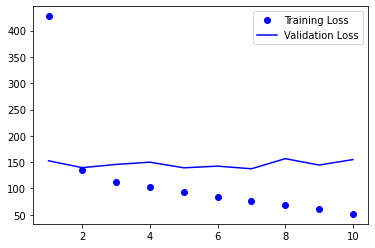

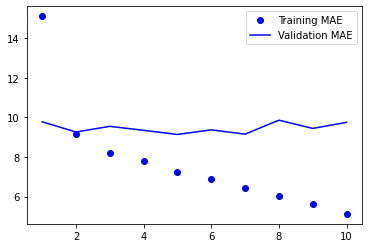

In [46]:
# Gets referene to model performance metrics over training and validation data

history = history.history

# Plots training and validation performance

plt.plot(range(1, epoch_count+1), history['loss'], "bo", label="Training Loss")
plt.plot(range(1, epoch_count+1), history['val_loss'], "b", label="Validation Loss")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel = "Loss"
plt.figure()

plt.plot(range(1, epoch_count+1), history['mae'], "bo", label="Training MAE")
plt.plot(range(1, epoch_count+1), history['val_mae'], "b", label="Validation MAE")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel = "Mean Absolute Error (MAE)"
plt.show()

In [47]:
# Checks for mean of validation loss

np.mean(history["val_mae"])

9.461677074432373

In [406]:
# Performs predictions on the test data

predictions = model.predict(X_test)

In [407]:
# Calculates mean absolute error for all predictions

mean_absolute_error(y_test, predictions)

9.974200394574334

In [48]:
# Now with validation and test performance analysed, let's train the model once again with all data so
# that the model can be used for real predictions

X_train, y_train = data_6_overs_agg_array[:,1:], data_6_overs_agg_array[:,0]

model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))   

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(X_train, y_train, batch_size=4, epochs=epoch_count)

Epoch 1/10
426/426 [==============================] - 3s 6ms/step - loss: 762.2563 - mae: 21.5266
Epoch 2/10
426/426 [==============================] - 3s 6ms/step - loss: 123.8547 - mae: 8.6340
Epoch 3/10
426/426 [==============================] - 3s 7ms/step - loss: 104.9774 - mae: 7.9385
Epoch 4/10
426/426 [==============================] - 3s 7ms/step - loss: 102.6546 - mae: 7.7132
Epoch 5/10
426/426 [==============================] - 4s 9ms/step - loss: 90.9740 - mae: 7.0837
Epoch 6/10
426/426 [==============================] - 5s 11ms/step - loss: 89.2237 - mae: 6.8878
Epoch 7/10
426/426 [==============================] - 4s 10ms/step - loss: 77.0361 - mae: 6.5425
Epoch 8/10
426/426 [==============================] - 6s 14ms/step - loss: 69.7060 - mae: 6.0893
Epoch 9/10
426/426 [==============================] - 4s 10ms/step - loss: 60.7384 - mae: 5.5706
Epoch 10/10
426/426 [==============================] - 4s 9ms/step - loss: 52.7943 - mae: 5.1864


In [49]:
# Saves the model into persistent store for later use

model.save("Models/Dense_ANN_Regressor")

INFO:tensorflow:Assets written to: Models/Dense_ANN_Regressor/assets


## From the above, the observed test data Mean Absolute Error (MAE) for this Dense Neural Network is around 10. Though it was expected that this model's test performance will outperform that of all other models implemented so far on these notebooks, but it could only beat test performance of Common Sense model (10.71) and Decision Tree model (11.12),  and scored less than score of Random Forest (9.70) and Gradient Boosted model (8.95)

## Scope of future work on this is 
### 1) to refer the dataset once again to check if any other preprocessing is required in order to get new feature(s) and/or optimize any existing feature(s), and
### 2) to try differ models both from shallow and deep learning techniques